In [1]:
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 36.4MB/s]


In [2]:
!unzip titanic-dataset.zip

Archive:  titanic-dataset.zip
  inflating: Titanic-Dataset.csv     


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/titanic-dataset.zip')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Completeness**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
cdf = df.copy()
cdf.isna().sum()/len(cdf) *100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [7]:
df.drop('Cabin', axis=1, inplace=True)

In [8]:
def fill_age_null(row):
    if pd.isnull(row['Age']):
        return df.loc[df['Pclass'] == row['Pclass'], 'Age'].median()
    else:
        return row['Age']

# Apply the function to the DataFrame
df['Age'] = df.apply(fill_age_null, axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
def fill_age_null(row):
    if pd.isnull(row['Embarked']):
        return df.loc[df['Survived'] == row['Survived'], 'Embarked'].mode()
    else:
        return row['Embarked']

# Apply the function to the DataFrame
df['Embarked'] = df.apply(fill_age_null, axis=1)

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

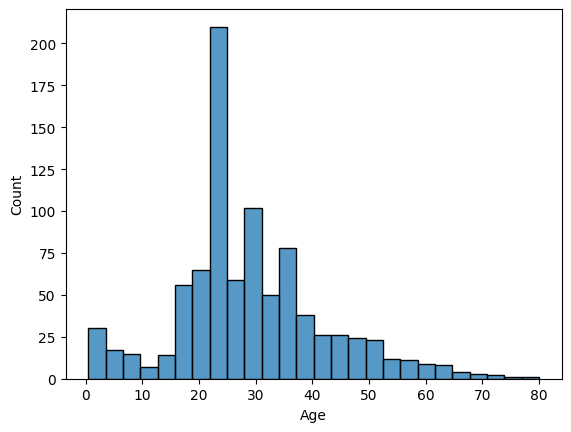

In [13]:
sns.histplot(x='Age',data=df)


In [14]:
import pandas as pd

# Function to handle outliers in 'Age'
def handle_age_outliers(row):
    age = row['Age']

    # Calculate Q1, Q3, and IQR for the 'Age' column
    Q1 = df['Age'].quantile(0.25)
    Q3 = df['Age'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries for 'Age'
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Handle outliers: set to lower or upper bound
    if age < lower_bound:
        return lower_bound
    elif age > upper_bound:
        return upper_bound
    else:
        return age

# Apply the function to the DataFrame
df['Age'] = df.apply(handle_age_outliers, axis=1)

print("Data after handling outliers:")
df.info()


Data after handling outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.903109,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,12.798108,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,59.500000,8.000000,6.000000,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

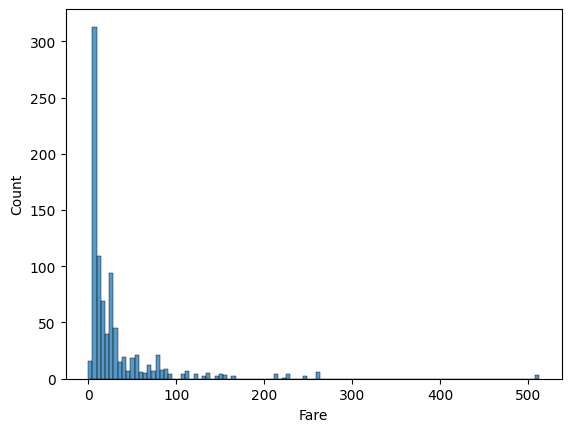

In [16]:
sns.histplot(x='Fare',data=df)


In [17]:
df.value_counts('Fare')

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
8.1125,1
8.1375,1
17.4000,1


In [18]:
import pandas as pd

# Function to handle outliers in 'Age'
def handle_age_outliers(row):
    age = row['Fare']

    # Calculate Q1, Q3, and IQR for the 'Age' column
    Q1 = df['Fare'].quantile(0.25)
    Q3 = df['Fare'].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries for 'Age'
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Handle outliers: set to lower or upper bound
    if age < lower_bound:
        return lower_bound
    elif age > upper_bound:
        return upper_bound
    else:
        return age

# Apply the function to the DataFrame
df['Fare'] = df.apply(handle_age_outliers, axis=1)

print("Data after handling outliers:")
df.info()


Data after handling outliers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
df.drop('PassengerId', axis=1, inplace=True)


In [20]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [24]:
df['Age'] = np.ceil(df['Age']).astype(int)


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df['Embarked'] = label_encoder.fit_transform(df['Embarked'].astype(str))



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [27]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,28.929293,0.523008,0.381594,24.046813,2.529742
std,0.486592,0.836071,0.477990,12.832129,1.102743,0.806057,20.481625,0.800254
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,60.000000,8.000000,6.000000,65.634400,3.000000


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Assuming 'df' is your DataFrame

# Features to be scaled
features = ['Sex','Age','Pclass','SibSp','Fare','Embarked','Parch']  # Replace with actual feature columns

# Create separate DataFrames for features and target
X = df[features]
y = df['Survived']  # Replace with your target column

# Standardization
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

<ipython-input-29-c971c639b8ba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


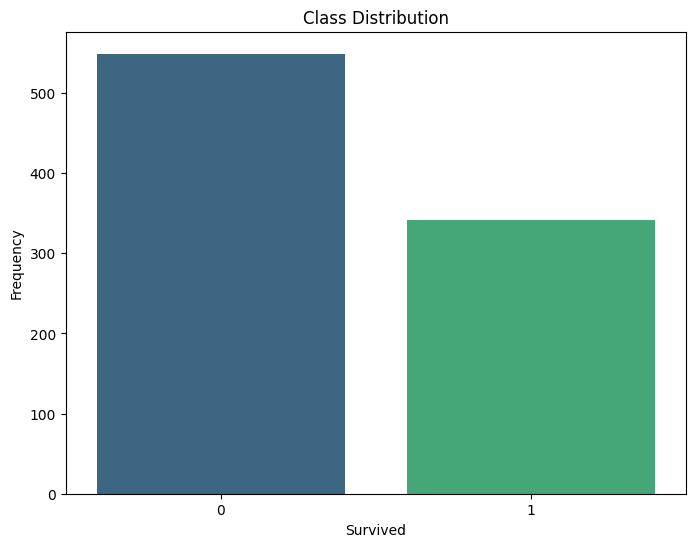

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = df['Survived'].value_counts()

# Bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [31]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [32]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       112
           1       0.82      0.73      0.77        67

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the SVM model with a linear kernel (you can try 'poly', 'rbf', etc.)
svm_model = SVC(kernel='linear', C=1.0, random_state=0)

# Train the model
svm_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8324022346368715
Confusion Matrix:
 [[103   9]
 [ 21  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       112
           1       0.84      0.69      0.75        67

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8059701492537313
Confusion Matrix:
 [[145  23]
 [ 29  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       168
           1       0.76      0.71      0.73       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.80       268



In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7877094972067039
Confusion Matrix:
 [[96 14]
 [24 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179

